
# Project: Investigate a Dataset - No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

It was taken from https://www.kaggle.com/datasets/joniarroba/noshowappointments

### Independent and Dependent variables
There are 13 Independent Variables: 

1. PatientId
2. AppointmentID
3. Gender
4. ScheduledDay
5. AppointmentDay
6. Age
7. Neighbourhood
8. Scholarship
9. Hypertension
10. Diabetes
11. Alcoholism
13. Handicap
13. SMSReceived

The Dependent Variable is 'No-Show'


### Question(s) for Analysis.

We want to find trends between the independent variable and the dependent variable.

1. What is the percentage of patients who showed up to those who did not show up ?
2. Does the patient receiving an sms associated with them showing up to their appointment?
3. Which one between age and gender is best factor for patient showing up to their appointment?
4. Does the patient having scholarship correlate to them showing up to their appointment?




In [231]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

imported the packages numpy,pandas,matplotlib and seaborn.  
%matplotlib inline is the magic work to display the graphs in same page.

<a id='wrangling'></a>
## Data Wrangling


### This is where we look at the dataset in details and mention anything we notice about the data.

In [232]:
# Reading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

noshowappointments-kagglev2-may-2016.csv

In [233]:
# showing the first  rows of the data set
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We use the head() method to view the first 5 rows of the table to get an idea of what the dataset looks like.

### Variable information
- PatientId: The patient's identification.   
- AppointmentID: identification of each appoitnment.
- Gender: The gender of the patients (M - male and F - female).	
- ScheduledDay: what day the patient set up their appointment. 	
- AppointmentDay: what day the patient is supposed to show for scheduled appointment.
- Age: The age of the patient in years.	
- Neighbourhood: Indicates the location of the appointment.
- Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Hipertension: indicates whether the patiemt has Hypertension or not. (1-yes, 0-no)
- Diabetes: indicates whether the patiemt has Diabetes or not. (1-yes, 0-no)
- Alcoholism: indicates whether the patiemt has Alcoholism or not. (1-yes, 0-no)	
- Handcap: indicates whether the patiemt has Handicap or not. (1-yes, 0-no)	
- SMS_received: indicates whether the patiemt has received an SMS or not. (1-yes, 0-no)	
- No-show: Indicates whether the patient showed up or did not show up for the appointment. 

(#note: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up)

From the above dataset we can see that there are 14 variables(columns) in total.

In [234]:
# looking at the dimensioanlity of the dataset
df.shape

(110527, 14)

The dataset consists of 110527 rows and 14 columns

In [235]:
#The  concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### The concise summary of the dataset
The df.info() method prints summary information about the dataset's index and column data types, non-null values and memory usage.

There are no null values in the dataset.

The dataset contains 1 float64 datatype (patientID), 8 int64 datatype (AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap,SMS_received) and 5 object datatypes (Gender, ScheduledDay, AppointmentDay, Neighbourhood, No-show)

The dataset occupies 11.8+ MB memory usage

In [236]:
# Looking at the summary statistics (descriptive) of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This describe() method only displays the desriptive continous variables such as int64 and float64.

In [237]:
# Pass the all as argument in the describe() method to include the categorical variables
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### The descriptive summary statistics fo categorical variables
The df.describe(include=object) method will generates descriptive summary statistics of the categorical variables.  
The df.describe(include='all') metohd will generate both the categorical and continous variables.

The summary shows:

For categorical variables we notice the Gender variable data only contains two (2) unique values most probably M for male and F for female, with F - Female being the most in the dataset with a count of 71840.
For ScheduledDay and AppointmentDay variable we have 103549 and 27 unique values respectively.
We have 81 unique values for Neighbourhood variable and JARDIM CAMBURI	being the highest with 7717 values.
For the No-show variable we have 2 unique values yes and no, with no being the highest with 88208 values.

As there is no numeric data on the columns (Scholarship, Hipertension,Diabetes,Alcoholism,Handcap,SMS_received) it makes sense to convert them to object since they are yes or no values (dummy variables).

We have 4 values for handicap it will be consistent with other columns if we changed the values to 2 value with 0 = not handicap and 1 = having a handicap.

For continous data we notice for age having a minimum of a negative number which doesnt make sense as age cant be negative and the highest age being 115 years with the average age of 37 years and most of the patients concentrated within the ages of 18 and 55 years. 

We will probably have to drop the PatientId	and AppointmentID columns as they are computer generated and wont help much in finding trends to determine the show and no show of patients to their appointments. Although will have to look at this columns first for any duplicates in the dataset as they are unique computer generated values before dropping them.

### Data Incosistencies to look at

1. Convert PatientId datatype from float64 to int64.
2. Convert 	ScheduledDay and AppointmentDay datatype to datetime.
3. Fix all typos in column names.
4. Ignore the time in the time stamp of ScheduledDay and AppointmentDay.
5. Convert the datatype of these columns .(Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received) from int64 to object since they are true or false values.
6. Convert all the columns names to lower case and use underscore(-) to seperate a two word name (eg. patient_id).
7. Look for any outliers in the dataset.
8. convert handicap to 2 value from 4



In [238]:
# view some sample data
df.sample(n = 10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
76205,9.624778e+13,5688179,M,2016-05-12T07:06:06Z,2016-05-12T00:00:00Z,0,ARIOVALDO FAVALESSA,0,0,0,0,0,0,No
60792,8.999963e+13,5513104,F,2016-03-28T09:29:31Z,2016-05-19T00:00:00Z,1,JARDIM CAMBURI,0,0,0,0,0,0,No
5129,4.484968e+12,5694502,F,2016-05-13T08:42:20Z,2016-05-17T00:00:00Z,83,PARQUE MOSCOSO,0,1,0,0,0,0,No
62839,4.323753e+13,5734357,F,2016-05-24T15:24:51Z,2016-05-24T00:00:00Z,36,JARDIM CAMBURI,0,0,0,0,0,0,No
40561,8.121397e+13,5697431,M,2016-05-13T15:51:43Z,2016-05-13T00:00:00Z,48,MÁRIO CYPRESTE,0,0,0,0,0,0,No
62816,6.981854e+13,5654806,F,2016-05-03T15:16:46Z,2016-05-03T00:00:00Z,77,JARDIM CAMBURI,0,0,0,0,0,0,No
56311,6.157575e+13,5522083,F,2016-03-29T13:38:21Z,2016-05-02T00:00:00Z,24,GURIGICA,0,0,0,0,0,0,Yes
30430,3.871195e+13,5596643,M,2016-04-18T15:01:17Z,2016-05-02T00:00:00Z,56,CENTRO,0,0,0,0,0,0,Yes
92864,2.118195e+11,5772759,F,2016-06-03T16:12:16Z,2016-06-08T00:00:00Z,53,JARDIM CAMBURI,0,1,1,0,0,1,No
94048,4.819879e+12,5783035,M,2016-06-07T13:06:47Z,2016-06-08T00:00:00Z,62,CENTRO,0,0,0,0,0,0,No


We look at 10 random samples of the data and move to cleaning data.


## Data Cleaning
### This is where we perform the cleaning steps we mentioned in data wrangling.

In [239]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

change the data type of PatientId to int64 from float64 to keep the data consistent

In [240]:
# Convert ScheduledDay and AppointmentDay from 'bject type to datetime64[ns]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

change the data type to date to be able to work with the columns 

In [241]:
# Rename incorrect column names with typos.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

Renamed the column names with typos

In [242]:
# Rename incorrect column names by adding the underscore (_) .
df = df.rename(columns={'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day','PatientId': 'Patient_Id', 'AppointmentID': 'Appointment_ID', 'No-show': 'No_Show'})

Renamed incorrect column names by adding the underscore (_) to have consistency in the data when we change the column names to lower case.

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient_Id       110527 non-null  int64         
 1   Appointment_ID   110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   Scheduled_Day    110527 non-null  datetime64[ns]
 4   Appointment_Day  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  SMS_received     110527 non-null  int64         
 13  No_Show          110527 non-null  object        
dtypes: datetime64[ns](2)

In [244]:
# function to loop to the columns to lower case
df.columns = [c.lower() for c in df.columns]

Used a for loop to convert all the column names to lower cases to make it easier to work with the data.

In [245]:
# checking for duplicated appointments
df.appointment_id.duplicated().value_counts()

False    110527
Name: appointment_id, dtype: int64

The number of false is the same as the rows of the rows 110527 which shows that there is no duplicated values in the dataset

In [246]:
# checking for unique values in AppointmentID
df.appointment_id.unique().size

110527

As expected the number of unique AppointmentID's is the same as the number of rows in the dataset.

In [247]:
#look at the data again
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [248]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system generated numbers.
df.drop(['patient_id', 'appointment_id'], axis=1, inplace=True)

we dropped the computer generated values columns of patient_id and appointment_id as they would not help us to find trends in the dataset. But we made sure to use the appointment_id to look for duplicated values before dropping it.

In [249]:
# confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110527 non-null  object        
 1   scheduled_day    110527 non-null  datetime64[ns]
 2   appointment_day  110527 non-null  datetime64[ns]
 3   age              110527 non-null  int64         
 4   neighbourhood    110527 non-null  object        
 5   scholarship      110527 non-null  int64         
 6   hypertension     110527 non-null  int64         
 7   diabetes         110527 non-null  int64         
 8   alcoholism       110527 non-null  int64         
 9   handicap         110527 non-null  int64         
 10  sms_received     110527 non-null  int64         
 11  no_show          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


We are now left with 12 columns out of 14 we had before.

In [250]:
# Function to print unique values for all columns
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['F' 'M']
scheduled_day: ['2016-04-29T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-04-20T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-04-18T00:00:00.000000000'
 '2016-04-11T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-04-15T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-04-05T00:00:00.000000000' '2016-04-08T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-07T00:00:00.000000000' '2016-03-17T00:00:00.000000000'
 '2016-03-30T00:00:00.000000000' '2016-03-29T00:00:00.000000000'
 '2016-03-18T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-04T00:00:00.000000000' '2016-03-15T00:00:00.000000000'
 '2016-03-14T00:00:00.000000000' '2016-03-21T00:00:00.000000000'
 '2016-03-23T00:00:00.000000000' '2016-03-22T00:00:00.000

Look for unique values in the data to get a better idea of the data

### working with age variable

In [251]:
np.sort(df.age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

we sorted the age variable in ascending order and noticed a negative age value which could be an error

In [252]:
# Looking for values where age is less than zero.
df.query('age < 0').size

12

12 values are less than zero.

In [253]:
# dropping the values of age that are -1
df.drop(df[df['age'] <= 0].index, inplace = True)

Decided to drop all the values that are less than 0

In [254]:
# To comfirm the values were removed from the dataset
df.query('age <= 0').size

0

As expected we got the value zero which confirms the values were removed.

In [255]:
# Removing outliers using the IQR method
percentile_25 = df.age.quantile(0.25)
percentile_75 = df.age.quantile(0.75)

iqr = percentile_75 - percentile_25
iqr


37.0

we calculate the 1st and 2nd percentile of age using the quantile method and then calculate the iqr of the age variable which we found to be 37.

In [256]:
# lower outlier
low_outlier = percentile_25 - (1.5 * iqr)
# high outlier
high_outlier = percentile_75 + (1.5 * iqr)
low_outlier,high_outlier

(-36.5, 111.5)

we will consider any value below -36.5 and above 111.5 as outliers and remove them from the dataset.

In [257]:
# dropping the values of age that are considered outliers
df.drop(df[df['age'] <= low_outlier].index, inplace = True)
df.drop(df[df['age'] >= high_outlier].index, inplace = True)

we dropped all the rows with age below and above the low and high outliers

In [258]:
np.sort(df.age.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 102], dtype=int64)

The -1 values were removed from the dataset as well as the 115 age value which was an outlier.

### Dealing with schedule and appointment data

In [259]:
# get the unique dates in the scheduled date 
np.sort(df.scheduled_day.dt.strftime('%Y-%m-%d').unique())

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

we notice that the first scheduled date is 10 Novemeber 2015 [2015-11-10] and last is 8 June 2016 [2016-06-08], which is little over 7 month period.

In [260]:
# sort the unique values of appointment day.
np.sort(df.appointment_day.dt.strftime('%Y-%m-%d').unique())

array(['2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-24', '2016-05-25', '2016-05-30',
       '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
       '2016-06-06', '2016-06-07', '2016-06-08'], dtype=object)

we notice that the first appointment date is between 29 April 2016 [2016-04-29] and last is 8 June 2016 [2016-06-08], which is little over 1 month period. This is completely different from the scheduled date time period of over 7 months.


In [261]:
# Getting day of the week for scheduledday and appointmentday
df['scheduled_day_week'] = df['scheduled_day'].dt.strftime("%A")
df['appointment_day_week'] = df['appointment_day'].dt.strftime("%A")

we created two new columns for scheduled_day_week and appointment_day_week which displays only the day of the week of the date.

In [262]:
# get the waiting period between shceduling and appointment date
df['awaiting_time'] = df['appointment_day'] - df['scheduled_day']

Using the created days of the week columns we calculate the waiting period of the appointment and schedule day.

In [263]:
# Find the number of dates whose dates is less than 0
df[df.awaiting_time < '0 days'].shape[0]

5

We have 5 rows whose waiting period is below zero, this means the appointment date is before scheduled date.

In [264]:
# display the table with only the waiting period is below zero.
df[df.awaiting_time < '0 days']

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_week,appointment_day_week,awaiting_time
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Tuesday,Monday,-1 days
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Wednesday,Tuesday,-1 days
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Thursday,Wednesday,-1 days
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Wednesday,Thursday,-6 days
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,Tuesday,-1 days


The 5 errors we confirmed above in a tabular form.

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   gender                106982 non-null  object         
 1   scheduled_day         106982 non-null  datetime64[ns] 
 2   appointment_day       106982 non-null  datetime64[ns] 
 3   age                   106982 non-null  int64          
 4   neighbourhood         106982 non-null  object         
 5   scholarship           106982 non-null  int64          
 6   hypertension          106982 non-null  int64          
 7   diabetes              106982 non-null  int64          
 8   alcoholism            106982 non-null  int64          
 9   handicap              106982 non-null  int64          
 10  sms_received          106982 non-null  int64          
 11  no_show               106982 non-null  object         
 12  scheduled_day_week    106982 non-null  objec

In [266]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_week,appointment_day_week,awaiting_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0 days


### dealing with handicap

In [267]:
# Convert handicap to 2 levels from 4 levels

# checking for unique values in AppointmentID
df.handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

the variable has 5 unique values.

In [268]:
df.handicap.value_counts()

0    104746
1      2037
2       183
3        13
4         3
Name: handicap, dtype: int64

we look at the totals of all the levels and notice that they are not that significant so we can group the together as handicap level.

In [269]:
# changing the handicap values to two values
df.loc[df['handicap'] >= 1,'handicap'] = 1

we changed the all the rows where the value for handicap where above 1 to mean 1 = handicap and 0 = no handicap. 

In [270]:
# Look at the value counts to confirms the changes made.
df.handicap.value_counts()

0    104746
1      2236
Name: handicap, dtype: int64

as expected all the values above 1 are added together

### converting type

In [271]:
# converting the columns to object type
df['scholarship'] = df['scholarship'].astype('object')
df['hypertension'] = df['hypertension'].astype('object')
df['diabetes'] = df['diabetes'].astype('object')
df['alcoholism'] = df['alcoholism'].astype('object')
df['handicap'] = df['handicap'].astype('object')
df['sms_received'] = df['sms_received'].astype('object')

we changed all the colmun types to object since they are categorical values of yes or no.

In [272]:
# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   gender                106982 non-null  object         
 1   scheduled_day         106982 non-null  datetime64[ns] 
 2   appointment_day       106982 non-null  datetime64[ns] 
 3   age                   106982 non-null  int64          
 4   neighbourhood         106982 non-null  object         
 5   scholarship           106982 non-null  object         
 6   hypertension          106982 non-null  object         
 7   diabetes              106982 non-null  object         
 8   alcoholism            106982 non-null  object         
 9   handicap              106982 non-null  object         
 10  sms_received          106982 non-null  object         
 11  no_show               106982 non-null  object         
 12  scheduled_day_week    106982 non-null  objec

We now have 106982 entries compared to the 110527 entries we started with and 15 columns this after we dropped some values and columns and added new columns.The naming is consistent and lower case and the variables have their correct data types.

In [273]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_week,appointment_day_week,awaiting_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0 days


Three new columns where added to the dataset to help us analyse the data better.

In [274]:
# view some sample data
df.sample(n=5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_week,appointment_day_week,awaiting_time
75172,M,2016-05-12,2016-05-12,31,REDENÇÃO,0,0,0,0,0,0,No,Thursday,Thursday,0 days
100262,M,2016-06-01,2016-06-01,39,BONFIM,1,0,0,0,0,0,No,Wednesday,Wednesday,0 days
42670,M,2016-05-05,2016-05-05,7,MARIA ORTIZ,0,0,0,0,0,0,No,Thursday,Thursday,0 days
59510,F,2016-05-30,2016-05-30,28,REDENÇÃO,1,0,0,0,0,0,No,Monday,Monday,0 days
52278,F,2016-05-17,2016-05-19,21,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Tuesday,Thursday,2 days


Five random samples where generated from the dataset. 

The data is cleaned and ready for exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis



### Defining Functions we gonna use 

In [275]:
# Function to plot the histogram 1 variable
def hist_plotter(var1):
    plt.hist(x = df[var1])
    plt.figsize=(10,8)
    plt.xlabel(var1)
    plt.ylabel('Count')
    plt.title(f'Histogram of {var1}')
    
# calling hist_plotter function
# hist_plotter(var1 = 'no_show')

In [276]:
# Function to plot the count plot for 1 variable
def count_plotter(var1, var2):
    ay = sns.countplot(data = df , x = df[var1] , palette = var2)
    ay.set_title(f'The {var1} variable count plot')
    plt.show()

# call the count_plotter function
#count_plotter(var1 = 'sms_received', var2 = "ch:.25")


In [329]:
# Function to plot the count plot for no show against variable (2d)
def count_plotter_2d(var1,var2,var3,var4,var5):
    ax = sns.countplot(x = df[var1], hue = df[var2], data = df, palette = var5)
    ax.set_title(f'The show / no show for {var1} variable count plot')
    x_ticks_labels=[var3, var4]
    ax.set_xticklabels(x_ticks_labels)
    plt.show()
    
# calling the count_plotter_2d function
#count_plotter_2d(var1 ='sms_received', var2 ='no_show', var3 = 'no smsreceived', var4 = 'smsreceived', var5 = "ch:.25")

### Research Question 1 
### What is the percentage of patients who showed up to those who didnt show up to their appointments?

We expect the patients who showed up to have a higher percentage.

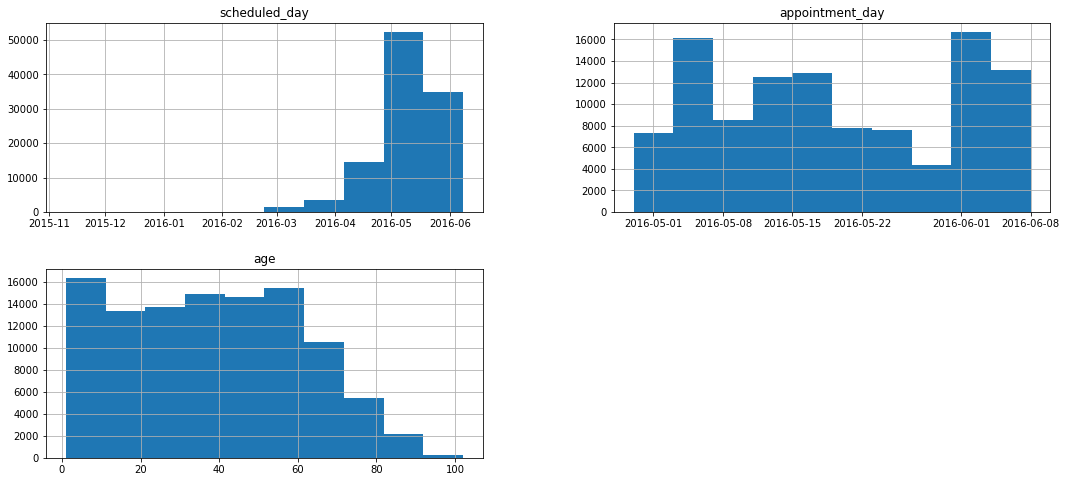

In [278]:
#Look at the histogram of the whole data.
df.hist(figsize=(18,8));

we notice scheduled day data is skewed to the left with the majority of patients scheduling their appointments on the month of May 2016, the appointment day data is skewed on both the left and right with majority of appointments being above 16 000 during the beginning of May and June 2016.
The age is evenly distributed from age 0 to 60 years with infants making the majority of the patients.

The histogram doesnt show data for object types

In [279]:
df["no_show"].value_counts()

No     85305
Yes    21677
Name: no_show, dtype: int64

85305 patients showed up to their appointment compared to 21677 patients who did'nt.

In [280]:
show = df["no_show"].value_counts()[0]
noshow = df["no_show"].value_counts()[1]
total_show_noshow = df["no_show"].value_counts()[0] + df["no_show"].value_counts()[1]
show,noshow,total_show_noshow

(85305, 21677, 106982)

85305 showed up while 21677 did'nt show up and 106982 total patients

In [281]:
# showed up percentage
show/total_show_noshow *100

79.73771288627994

close to 80% of the patients showed up to their appointment.

In [282]:
# no show percentage
noshow/total_show_noshow *100

20.262287113720063

close to 20% of the patients never showed up to their appointment.

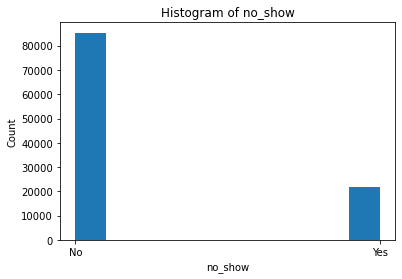

In [283]:
# Histogram of no show variable
hist_plotter(var1 = 'no_show')

The histogram of the no show variable confirms the inference we made above that 80% of patients showed up to their appointments.

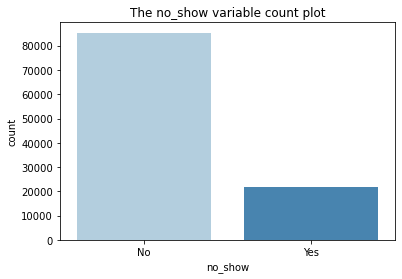

In [356]:
# The count plot for no show variable

count_plotter(var1 = 'no_show', var2 = "Blues")

Countplot are better suited for Categorical data and works the same way as histograms

Majority of the Patients, above 80000 showed up to their appointment.

### Research Question 2
### Does the patient receiving an sms correlate to them showing up to their appointment?
The inference is that the patients who receive an sms are most likely to show up to their appointment than those who didn't receive the sms.

In [285]:
df["sms_received"].value_counts()

0    72398
1    34584
Name: sms_received, dtype: int64

Majority of patients didn't receive their sms at 72398 and only 34584 of them received the sms

In [286]:
nosmsreceive = df["sms_received"].value_counts()[0]
receivesms = df["sms_received"].value_counts()[1]
total_sms_received = df["sms_received"].value_counts()[0] + df["sms_received"].value_counts()[1]
receivesms,nosmsreceive,total_sms_received

(34584, 72398, 106982)

In [287]:
# Patient received sms percentage
receivesms/total_sms_received *100

32.32693350283225

32 % of the patients receieved their sms

In [288]:
# Patient received no sms percentage
nosmsreceive/total_sms_received *100

67.67306649716774

68 % of the patients did not receive their sms. 

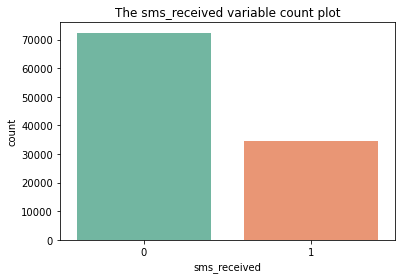

In [350]:
# Count plot for SMS received and no SMS received
count_plotter(var1 = 'sms_received', var2 = "Set2")

Over 7000 patients didnt receive teh sms and over 3000 patients receved their sms. 

In [291]:
# The values of patients who received sms/not receieved to those who showed/no show
df.groupby('sms_received')['no_show'].value_counts()

sms_received  no_show
0             No         60289
              Yes        12109
1             No         25016
              Yes         9568
Name: no_show, dtype: int64

The values of the patients who showed up is both high in cases where they either received the sms or they did not with 25016 and 60289 respectively. 

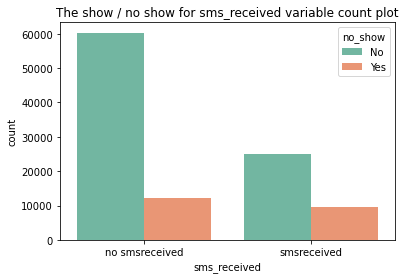

In [352]:
# count plot for show / no show for sms received 
count_plotter_2d(var1 ='sms_received', var2 ='no_show', var3 = 'no smsreceived', var4 = 'smsreceived', var5 = "Set2")

The graph shows that majority of the patients showed up even when they didnt receive their sms.

In [294]:
df[df.no_show == 'No'].groupby(['sms_received']).size()

sms_received
0    60289
1    25016
dtype: int64

60289 of the patients showed up to their appointment even when they receive an sms compared to 25016 who showed up after receiving an sms.

In [295]:
# Ratio of no show to sms received
df_s_ratio = df[df.no_show == 'No'].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
df_s_ratio

sms_received
0    0.832744
1    0.723340
dtype: float64

83 % of the patients who did not receive sms showed up compared to the 72 % who received sms and showed up

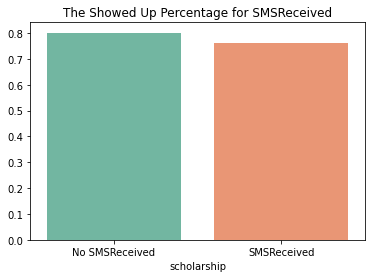

In [353]:
# visual for ratio of no show to sms received
ax = sns.barplot(x = df_s_ratio.index, y = df_s_ratio, palette = "Set2")
ax.set_title("The Showed Up Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

The distribution shows that percentage is higher 83 % of the patients who showed up compared to those who did receive an sms 72 %.

Patients will show up regardless of whether they received the sms or not which goes against our inference that the patient receiving sms is correlated to them showing up.

### Research Question 3
### Which one between age and gender is best factor for patient showing up to their appointment?

The inference is that females  and young people show up the most to their appointment as they are the majority.

Age is the only variable that we have that is numeric

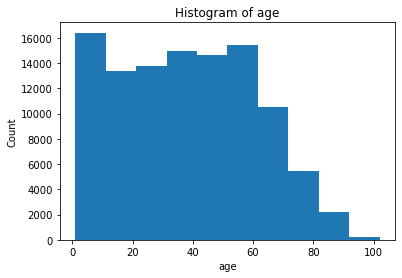

In [297]:
# Histogram for age
hist_plotter(var1 = 'age')

The age variable is skewed to the right with teh majority being infants who are less than a year old and the ages who show up the most being between the ages of  0 and 60 years.

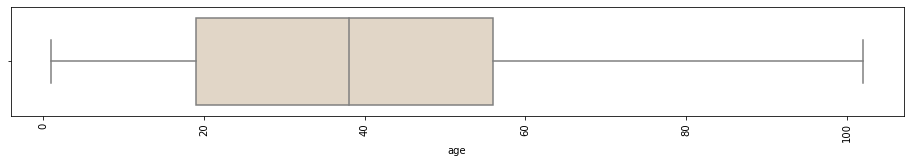

In [342]:
# boxplot for age
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.age , palette = "ch:.25")

The minimum age is 0 and maximum is 102 with the majority of the patients ages being between 19 and 56 years.

In [300]:
df["age"].mean()

38.31250116842086

The mean age is 38 years

In [301]:
df["age"].median()

38.0

The median age of the patients is 38 years.

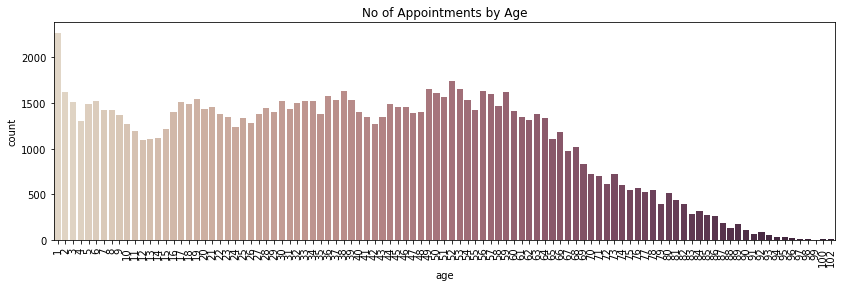

In [302]:
#Below we will plot the number of patients for different Age.

plt.figure(figsize=(14,4))
plt.xticks(rotation=90)
ax = sns.countplot(x = df.age , palette = "ch:.25")
ax.set_title("No of Appointments by Age")
plt.show()

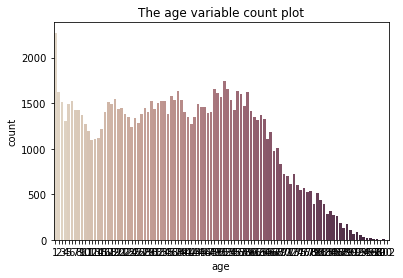

In [357]:
# call the count_plotter function for age
#count_plotter(var1 = 'age', var2 = "ch:.25") # same code but as function

The distribution of patients age ranges between 1000 and 1600 patients between ages 0 and 70 years. This shows that the patients are mostly young people than old.

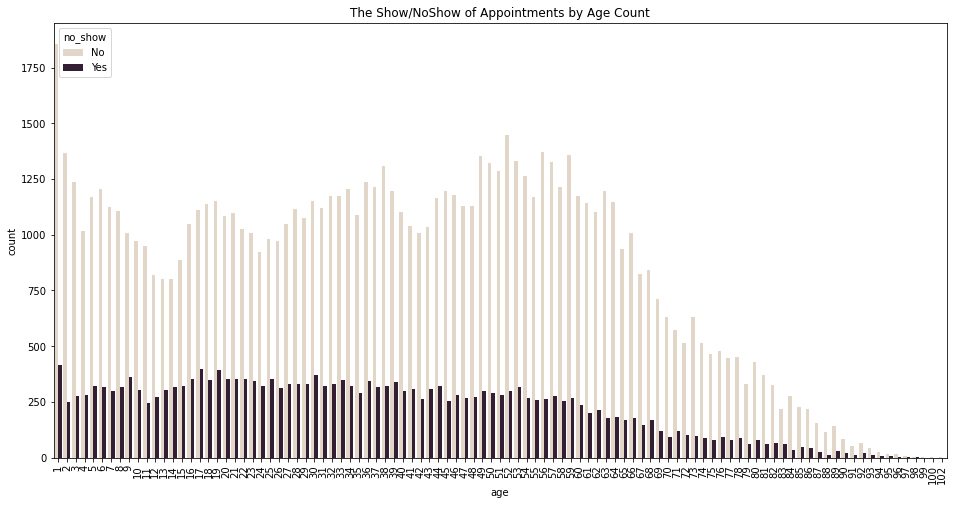

In [358]:
#Below we will plot the Show / NoShow for the patients based on their Age.
plt.figure(figsize = (16,8))
plt.xticks(rotation = 90)
ax = sns.countplot(x = df.age, hue = df.no_show , palette = "ch:.25")
ax.set_title("The Show/NoShow of Appointments by Age Count")
plt.show()

Majority of the age groups showed up to their appointment compared to those who ddnt.

In [305]:
# age ratio of no show
df_age_ratio = df[df.no_show == 'No'].groupby(['age']).size()/df.groupby(['age']).size()

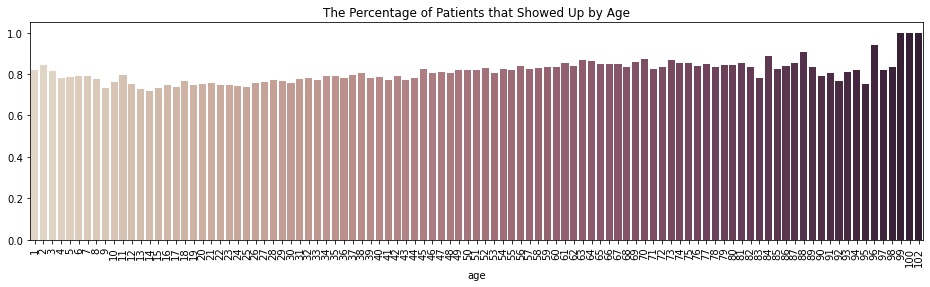

In [339]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x = df_age_ratio.index, y = df_age_ratio, palette = "ch:.25")
ax.set_title("The Percentage of Patients that Showed Up by Age")
plt.show()

The distribution is almost uniform for all ages showing that patients will show up regardless of their age.

# Gender

In [307]:
# values counts of females to males in the data
df["gender"].value_counts()

F    70113
M    36869
Name: gender, dtype: int64

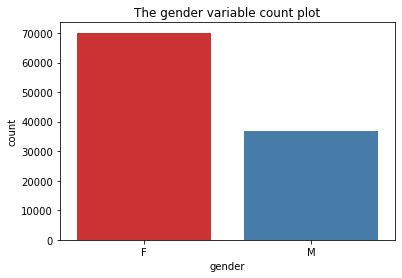

In [359]:
# The count plot for gender
count_plotter(var1 = 'gender', var2 = "Set1")

Almost 70000 of the patients are females compared to the 36869 of the males. 

In [310]:
females = df["gender"].value_counts()[0]
males = df["gender"].value_counts()[1]
total_gender = df["gender"].value_counts()[0] + df["gender"].value_counts()[1]
females,males,total_gender

(70113, 36869, 106982)

In [311]:
females/total_gender *100

65.53719317268325

66 % of the patients are females

In [312]:
males/total_gender *100

34.46280682731675

35 % of the patients are males

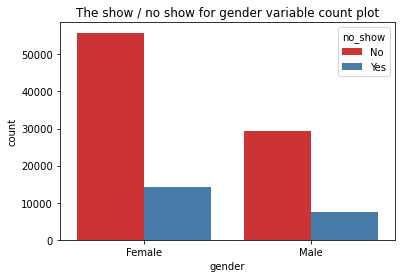

In [333]:
# countplot for gender
count_plotter_2d(var1 ='gender', var2 ='no_show', var3 = 'Female', var4 = 'Male', var5 = "Set1")

The plot shows that both genders showed up to their appointments with the females showing up the most. 

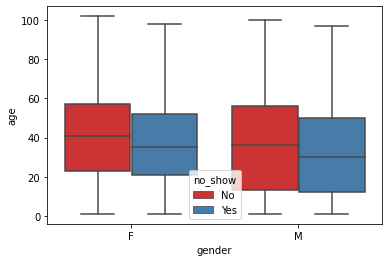

In [332]:
# plotting boxplot for gender using age and no sho
ax = sns.boxplot(x='gender', y='age', hue ='no_show',data=df , palette = "Set1")

This plot shows that the gender and age are correlated with no show variable since their summary statistics are almost the same. Though further analysis will have to be done to find out which one is better.  

### Research Question 4
### Does the patient having scholarship correlate to them showing up to their appointment?
The inference is that the patients who are enrolled in Brasilian welfare program Bolsa Família are are most likely to show up to their appointment than those who didn't.

In [316]:
# check the values of patients with scholsrship.
df["scholarship"].value_counts()

0    96173
1    10809
Name: scholarship, dtype: int64

96173 of patients are not enrolled in the Brasilian welfare program Bolsa Família compared to 10809 who did.

In [317]:
# assigning variables to make it easier to calculate percentage.
not_enrolled = df["scholarship"].value_counts()[0]
enrolled = df["scholarship"].value_counts()[1]
total_enrolled = df["scholarship"].value_counts()[0] + df["scholarship"].value_counts()[1]
not_enrolled,enrolled,total_enrolled

(96173, 10809, 106982)

In [318]:
# Patient scholarship percentage
enrolled/total_enrolled *100

10.103568824662092

10 % are enrolled with the Brasilian welfare program Bolsa Família which is quite a small number of patients.

In [319]:
# Patient scholarship percentage
not_enrolled/total_enrolled *100

89.89643117533791

90 % of the patinets are not enrolled with the Brasilian welfare program Bolsa Família which is a significant number of the population. 

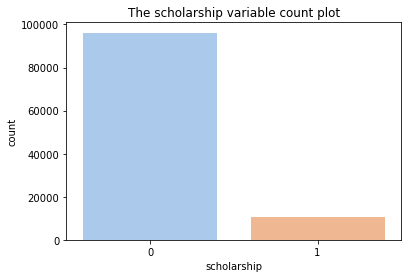

In [360]:
# countplot for scholarship
count_plotter(var1 = 'scholarship', var2 = "pastel")

Almost 100000 of the patienst are dont have schoalrships, which is the majority of the patients population and with this info we expect the scholarship to be associated with patients showing up to their appointment and we will do further analysis to confirm.

In [322]:
# The values of patients who hav scholarship and no scholarship to those who showed/no show
df.groupby('scholarship')['no_show'].value_counts()

scholarship  no_show
0            No         77067
             Yes        19106
1            No          8238
             Yes         2571
Name: no_show, dtype: int64

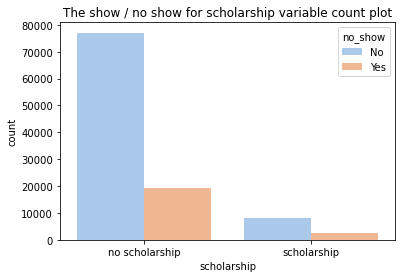

In [361]:
# The Show / NoShow for Scholarship Count
count_plotter_2d(var1 ='scholarship', var2 ='no_show', var3 = 'no scholarship', var4 = 'scholarship', var5 = "pastel")

The number of patients who showed up to their appointment is quite high for patients with no scholarship.

In [325]:
df[df.no_show == 'No'].groupby(['scholarship']).size()

scholarship
0    77067
1     8238
dtype: int64

77067 of patient who showed up have no scholarship compared to 8238 who showed up.

In [326]:
# Ratio of no show to scholarship
df_s_ratio = df[df.no_show == 'No'].groupby(['scholarship']).size()/df.groupby(['scholarship']).size()
df_s_ratio * 100

scholarship
0    80.133717
1    76.214266
dtype: float64

80 % of patients without scholarship showed up compared to 76 % of those with scholarship. Lets look at this analysis on bar chart below.

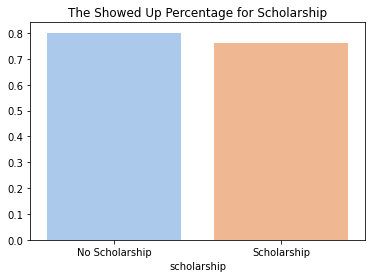

In [327]:
# visual for ratio of no show to sms received
ax = sns.barplot(x = df_s_ratio.index, y = df_s_ratio, palette = "pastel")
ax.set_title("The Showed Up Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

The distribution shows that both patients having scholarships and those who dont still show up to their appointment with in high ratio. 76 % for patients with scholarship is high and proves that scholarship is correlated with show up.

<a id='conclusions'></a>
## Conclusions

The Majority of patients showed uo to their to their scheduled appointments with 80 % of them doing so. We notice that the patients who receive their sms (72 %) showed up even though the majority is for thise who ddnt receuive an sms. With age being our only numeric measure we found that the mean age of our patients is 38 years and younger people show up more than old people this could be due majority of patienst being infnts (0 years) at over 2000 patients in number and with gender we notice females being in the majority to show up. We could use both age and gender to determine if patients could show up based on these factors.The last one we looked at is scholarship(patients enrolled with the Brasilian welfare program Bolsa Família) and 76% is the ratio of patients who have scholarship and showed up whcih is good to comfirm taht having scholarshp also correlates to show up. With majority of patients showing up to their appointment we can say that all these variables (age,gender,sms_received and scholarship) show association with patientt showing up to their scheduled appointments.



## Limitations

Age was our only numeric value in this dataset with the majority being categorical which meant most statistical analysis could not be made on this variales such as linear regression and correlation. This was multicollinearity problem further analysis will need to be made to determine which of these variables is best factor for patients showing up to their scheduled appointments.  

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1